###### Part I - Loans Data Exploration
## by Austin Jr Mnthambala

## Introduction
> This dataset is a collection of information on loans taken out by clients of prosper. This dataset includes prosper loan attributes, loan information and client demographic information.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
loans = pd.read_csv('prosperLoanData.csv')
loans.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
11666,9E88359574792253028B44E,1053381,2013-11-26 10:45:32.273000000,NaN,60,Current,NaN,0.20040,0.1765,0.1665,...,-33.80,0.00,0.0,0.0,0.0,1.0,0,0,0.0,1
27888,305834837870052280D620B,459977,2010-05-25 10:45:37.520000000,NaN,36,Completed,2013-06-04 00:00:00,0.37453,0.3500,0.3400,...,-72.26,0.00,0.0,0.0,0.0,1.0,0,0,0.0,21
52759,0AB33601265591125753EB2,1164843,2014-01-27 19:48:25.913000000,NaN,36,Current,NaN,0.27776,0.2394,0.2294,...,-1.73,0.00,0.0,0.0,0.0,1.0,0,0,0.0,6
45304,5CA8359006510539988435C,929296,2013-09-30 11:38:10.270000000,NaN,36,Current,NaN,0.33215,0.2925,0.2825,...,-6.06,0.00,0.0,0.0,0.0,1.0,0,0,0.0,3
109972,F9C83517981302254E2FD73,510157,2011-06-07 09:23:01.670000000,NaN,36,Completed,2013-05-07 00:00:00,0.22362,0.1899,0.1799,...,-71.22,0.00,0.0,0.0,0.0,1.0,0,0,0.0,80
65577,CB213551870397973EC5713,612218,2012-07-15 14:21:01.473000000,NaN,36,Past Due (61-90 days),NaN,0.35797,0.3177,0.3077,...,-39.52,-118.12,0.0,0.0,0.0,1.0,0,0,0.0,89
59130,C7D233657792143855F0BEC,30117,2006-08-09 07:10:57.707000000,B,36,Completed,2009-08-14 00:00:00,0.15211,0.1450,0.1375,...,-47.08,0.00,0.0,0.0,0.0,1.0,0,0,0.0,50
84654,5CAA34096992011333B94A9,260501,2008-01-05 16:08:13.757000000,E,36,Completed,2010-01-29 00:00:00,0.22237,0.2000,0.1900,...,-36.23,0.00,0.0,0.0,0.0,1.0,0,0,0.0,202
85322,D7F433953937827367DEA61,182366,2007-08-06 07:45:54.907000000,A,36,Completed,2010-08-10 00:00:00,0.10592,0.0990,0.0940,...,-24.29,0.00,0.0,0.0,0.0,1.0,0,0,0.0,84
33806,2FD93580035476817C6E534,792307,2013-05-30 05:44:19.677000000,NaN,60,Current,NaN,0.18136,0.1579,0.1479,...,-64.46,0.00,0.0,0.0,0.0,1.0,0,0,0.0,1


In [3]:
# high-level overview of data shape and composition
print(loans.shape)
print(loans.dtypes)

(113937, 81)
ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64


In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

### What is the structure of your dataset?

> There are 113,937 loans in the dataset with 81 features. Most variables are float in nature, but 10 variables are numeric, while there are 3 features with discrete categorical values which can be intrepreted into nominal categorical features (ProsperRating (numeric), ProsperScore, ListingCategory). There are four features that have categorical values, none of them are ordinal type but prosper score and prosper rating are both ordinal type feature with a 1-10 rating (10 being the best rating) for prosper score and HR - AA (AA being the best rating). There are four timeseries features mainly these are start and end dates. There are also thr|ee boleen features that dictate a true or false value to the IsBorrowerHomeowner, CurrentlyInGroup and IncomeVerifiable.

### What is/are the main feature(s) of interest in your dataset?

> I will be taking a closer observation at how investors use their money to fund loans across the year; this would be how much money was apporved for each loan, the amount of time the borrower put down to repay the loan taken, the fiscal year at the loaning organization, the fiscal quarter of that year and the amount of investors that funded each loan.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think these features will help me better understand the human aspect trends of the loans dataset. These features are: Term, LoanOriginalAmount, LoanOriginationQuarter, and Investors.

In [5]:
# Convert the "LoanStatus" column from a plain object type into an nominal categorical type
Loan_status = ['Cancelled',  'Chargedoff', 'Completed', 'Current', 'Defaulted', 'FinalPaymentInProgress', 'Past Due (>120 days)', 'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    loanStatus = pd.api.types.CategoricalDtype(ordered = False,
                                                categories = Loan_status)
    loans['LoanStatus'] = loans['LoanStatus'].astype(loanStatus)
else: # pre-v0.21
    loans['LoanStatus'] = loans['LoanStatus'].astype('category', ordered = False,
                                         categories = Loan_status)

In [6]:
loans['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [7]:
# Convert the "Term" column to a plain object type
loans['Term'] = loans['Term'].astype(str)

In [8]:
# Convert the "Term" column from a plain object type into an ordered categorical type
termlength = ['60', '36', '12']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    term_Length = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = termlength)
    loans['Term'] = loans['Term'].astype(term_Length)
else: # pre-v0.21
    loans['Term'] = loans['Term'].astype('category', ordered = True,
                                         categories = termlength)

In [9]:
loans['Term'].value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

In [10]:
# Convert the "ProsperRating (Alpha)" column from a plain object type into an ordered categorical type
prosper_rating = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    prosperRating = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = prosper_rating)
    loans['ProsperRating (Alpha)'] = loans['ProsperRating (Alpha)'].astype(prosperRating)
else: # pre-v0.21
    loans['ProsperRating (Alpha)'] = loans['ProsperRating (Alpha)'].astype('category', ordered = True, categories = prosper_rating)

In [11]:
loans['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

In [12]:
# dropping null values from 'ProsperScore' column to avoid errors
loans['ProsperScore'].dropna(inplace = True)

In [13]:
# Convert the "ProsperScore" column to a integer type from float type
loans['ProsperScore'] = loans['ProsperScore'].astype(int)

In [14]:
# filling null values in instances 11 is present to avoid ranking errors
loans['ProsperScore'].fillna(11, inplace = True)

In [15]:
# dropping null values from 'ProsperScore' column to avoid errors
loans['ProsperScore'].dropna(inplace = True)

In [16]:
# Convert the "ProsperScore" column to a plain object type
loans['ProsperScore'] = loans['ProsperScore'].astype(str)

In [17]:
# Changing the numerical categories to the actual borrower listing category for better understanding
loans['ProsperScore'] = loans['ProsperScore'].replace( '10.0', 'Lowest Risk')
loans['ProsperScore'] = loans['ProsperScore'].replace( '9.0', 'Very Low Risk')
loans['ProsperScore'] = loans['ProsperScore'].replace( '8.0', 'Low Risk')
loans['ProsperScore'] = loans['ProsperScore'].replace( '7.0', 'Below Average Risk')
loans['ProsperScore'] = loans['ProsperScore'].replace( '6.0', 'Average Risk')
loans['ProsperScore'] = loans['ProsperScore'].replace( '5.0', 'Above Average Risk')
loans['ProsperScore'] = loans['ProsperScore'].replace( '4.0', 'Significant Risk')
loans['ProsperScore'] = loans['ProsperScore'].replace( '3.0', 'High Risk')
loans['ProsperScore'] = loans['ProsperScore'].replace( '2.0', 'Higher Risk')
loans['ProsperScore'] = loans['ProsperScore'].replace( '1.0', 'Highest Risk')

In [18]:
# Convert the "ProsperScore" column from a plain object type into an ordered categorical type
prosper_score = ['Lowest Risk', 'Very Low Risk', 'Low Risk', 'Below Average Risk', 'Average Risk', 'Above Average Risk', 'Significant Risk', 'High Risk', 'Higher Risk', 'Highest Risk']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    prosperScore = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = prosper_score)
    loans['ProsperScore'] = loans['ProsperScore'].astype(prosperScore)
else: # pre-v0.21
    loans['ProsperScore'] = loans['ProsperScore'].astype('category', ordered = True,
                                         categories = prosper_score)

In [19]:
loans['ProsperScore'].value_counts()

Significant Risk      12595
Average Risk          12278
Low Risk              12053
Below Average Risk    10597
Above Average Risk     9813
High Risk              7642
Very Low Risk          6911
Higher Risk            5766
Lowest Risk            4750
Highest Risk            992
Name: ProsperScore, dtype: int64

In [20]:
# Convert the "ListingCategory (numeric)" column to a plain object type
loans['ListingCategory (numeric)'] = loans['ListingCategory (numeric)'].astype(str)

In [21]:
# Changing the numerical categories to the actual borrower listing category for better understanding
loans['ListingCategory (numeric)'] = loans['ListingCategory (numeric)'].replace( '0', 'Not Available')
loans['ListingCategory (numeric)'] = loans['ListingCategory (numeric)'].replace( '1', 'Debt Consolidation')
loans['ListingCategory (numeric)'] = loans['ListingCategory (numeric)'].replace( '2', 'Home Improvement')
loans['ListingCategory (numeric)'] = loans['ListingCategory (numeric)'].replace( '3', 'Business')
loans['ListingCategory (numeric)'] = loans['ListingCategory (numeric)'].replace( '4', 'Personal Loan')
loans['ListingCategory (numeric)'] = loans['ListingCategory (numeric)'].replace( '5', 'Student Use')
loans['ListingCategory (numeric)'] = loans['ListingCategory (numeric)'].replace( '6', 'Auto')
loans['ListingCategory (numeric)'] = loans['ListingCategory (numeric)'].replace( '7', 'Other')
loans['ListingCategory (numeric)'] = loans['ListingCategory (numeric)'].replace( '8', 'Baby&Adoption')
loans['ListingCategory (numeric)'] = loans['ListingCategory (numeric)'].replace( '9', 'Boat')
loans['ListingCategory (numeric)'] = loans['ListingCategory (numeric)'].replace( '10', 'Cosmetic Procedure')
loans['ListingCategory (numeric)'] = loans['ListingCategory (numeric)'].replace( '11', 'Engagement Ring')
loans['ListingCategory (numeric)'] = loans['ListingCategory (numeric)'].replace( '12', 'Green Loans')
loans['ListingCategory (numeric)'] = loans['ListingCategory (numeric)'].replace( '13', 'Household Expenses')
loans['ListingCategory (numeric)'] = loans['ListingCategory (numeric)'].replace( '14', 'Large Purchases')
loans['ListingCategory (numeric)'] = loans['ListingCategory (numeric)'].replace( '15', 'Medical/Dental')
loans['ListingCategory (numeric)'] = loans['ListingCategory (numeric)'].replace( '16', 'Motorcycle')
loans['ListingCategory (numeric)'] = loans['ListingCategory (numeric)'].replace( '17', 'RV')
loans['ListingCategory (numeric)'] = loans['ListingCategory (numeric)'].replace( '18', 'Taxes')
loans['ListingCategory (numeric)'] = loans['ListingCategory (numeric)'].replace( '19', 'Vacation')
loans['ListingCategory (numeric)'] = loans['ListingCategory (numeric)'].replace( '20', 'Wedding Loans')

In [22]:
# Renaming the listing categories column to reflect the new values
loans.rename(columns={"ListingCategory (numeric)": "ListingCategory"}, inplace = True)

In [23]:
# Convert the "ListingCategory" column from a plain object type into an ordered categorical type
listing_category = ['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 'Student Use', 'Auto', 'Other', 'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 'Household Expenses', 'Large Purchases', 'Medical/Dental', 'Motorcycle', 'RV', 'Taxes', 'Vacation', 'Wedding Loans']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    listingCategory = pd.api.types.CategoricalDtype(ordered = False,
                                                categories = listing_category)
    loans['ListingCategory'] = loans['ListingCategory'].astype(listingCategory)
else: # pre-v0.21
    loans['ListingCategory'] = loans['ListingCategory'].astype('category', ordered = False,
                                         categories = listing_category)

In [24]:
loans['ListingCategory'].value_counts()

Debt Consolidation    58308
Not Available         16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: ListingCategory, dtype: int64

In [25]:
# Convert the "IncomeRange" column to a plain object type
loans['IncomeRange'] = loans['IncomeRange'].astype(str)

In [26]:
# Convert the "IncomeRange" column from a plain object type into an ordered categorical type
income_range = ['$100,000+','$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0', 'Not employed', 'Not displayed']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    incomeRange = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = income_range)
    loans['IncomeRange'] = loans['IncomeRange'].astype(incomeRange)
else: # pre-v0.21
    loans['IncomeRange'] = loans['IncomeRange'].astype('category', ordered = True,
                                         categories = income_range)

In [27]:
loans['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [28]:
# dropping null values from 'LoanOriginationQuarter' column to avoid errors
loans['LoanOriginationQuarter'].dropna(inplace = True)
 
# new data frame with split value columns
loanQ = loans['LoanOriginationQuarter'].str.split(" ", n = 1, expand = True)
 
# making separate loan original quarter column from new data frame
loans["LoanOriginQuarter"]= loanQ[0]
 
# making separate fiscal quarter year column from new data frame
loans["LoanQuarterYear"]= loanQ[1]
 
# Dropping 'LoanOriginationQuarter' column
loans.drop(columns =["LoanOriginationQuarter"], inplace = True)

In [29]:
# Convert the "LoanOriginQuarter" column from a plain object type into an ordered categorical type
loan_quarter = ['Q4','Q3', 'Q2', 'Q1']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    loanQuarter = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = loan_quarter)
    loans['LoanOriginQuarter'] = loans['LoanOriginQuarter'].astype(loanQuarter)
else: # pre-v0.21
    loans['LoanOriginQuarter'] = loans['LoanOriginQuarter'].astype('category', ordered = True,
                                         categories = loan_quarter)

In [30]:
loans['LoanOriginQuarter'].value_counts()

Q4    31386
Q1    29678
Q3    27967
Q2    24906
Name: LoanOriginQuarter, dtype: int64

In [31]:
# dropping null value rows to avoid errors
loans.dropna(subset=['Term', 'LoanOriginalAmount', 'Investors'], inplace = True)

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


#### What's the distribution between Fiscal quarters, term, loan amount and number of investors.

Text(0.5,1,'Distribution of Yearly Quarters')

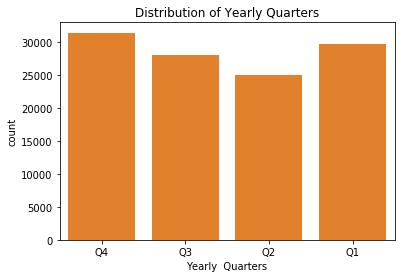

In [32]:
# using a bar chart to display the distribution of loan original quarter
default_color = sb.color_palette()[1]
sb.countplot(data = loans, x = 'LoanOriginQuarter', color = default_color)
plt.xlabel('Yearly  Quarters')
plt.title('Distribution of Yearly Quarters')

Amongst the four breakdown of the fiscal year, the highest loan activity is in the fourth quarter with almost 25000 loans dealt with in then. The order then goes; Q1 then Q3 then Q2 with the amount of loans dealt with then being just above 15,000.

Text(0.5,1,'Distribution of Loan Term')

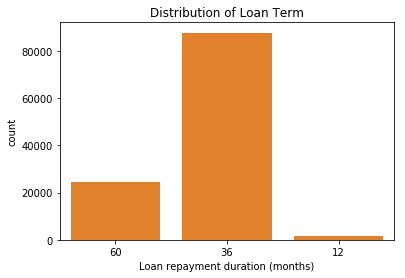

In [33]:
# using a bar chart to display the distribution of loan payment terms
sb.countplot(data = loans, x = 'Term', color = default_color)
plt.xlabel('Loan repayment duration (months)')
plt.title('Distribution of Loan Term')

The most preferred loan repayment duration is 36 months which translates to 3 years. The least chosen payment duration is 12 months which translates to 1 year which is understandable. 36 has just under 60,000 clients choosing it as their ideal repayment option while 12 has less than 5000 clients.

In [34]:
# checking the numerical range of the loan amount column to identify if a log scale is needed
loans['LoanOriginalAmount'].describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

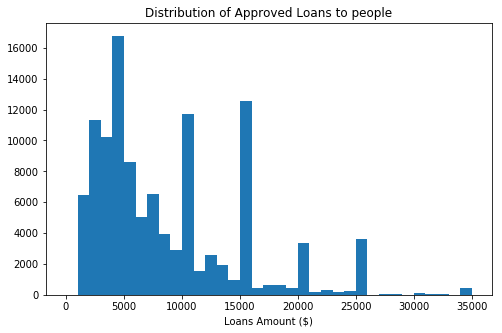

In [35]:
# using a standard to get a idea of the shape of the loan amount trend
binsize = 1000
bins = np.arange(0, loans['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loans Amount ($)')
plt.title('Distribution of Approved Loans to people')
plt.show()

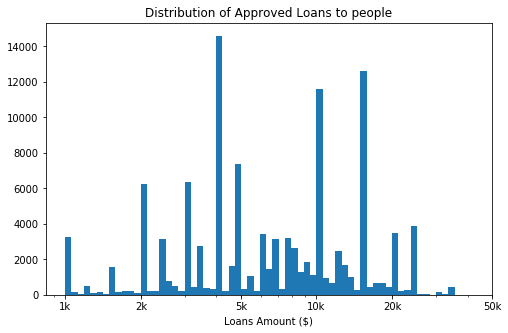

In [36]:
# using a log scale since our values go in excess of 30,000 and a tail was forming towards the end.
log_binsize = 0.025
bins = 10 ** np.arange(3, np.log10(loans['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([1e3, 2e3, 5e3, 1e4, 2e4, 5e4], ['1k', '2k', '5k', '10k', '20k', '50k'])
plt.xlabel('Loans Amount ($)')
plt.title('Distribution of Approved Loans to people')
plt.show()

The loan amount trailed off after 15000 and was forming a long-tailed distribution, with a lot of loans on the lower amount, and fewer on the higher loan amounts. When plotted on a log-scale, the loan amount distribution is multimodal, with the highest peak between 4000 and 5000. Interestingly, there's a massive drop right after the peak. There are two other peaks between 10,000 and 20,000.

In [37]:
# checking the numerical range of the loan amount column to identify if a log scale is needed
loans['Investors'].describe()

count    113937.000000
mean         80.475228
std         103.239020
min           1.000000
25%           2.000000
50%          44.000000
75%         115.000000
max        1189.000000
Name: Investors, dtype: float64

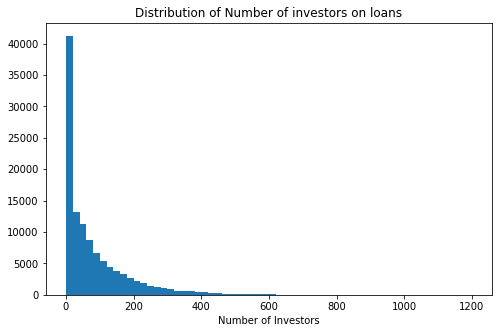

In [38]:
# using a standard to get a idea of the shape of the number of investors trend
binsize = 20
bins = np.arange(0, loans['Investors'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'Investors', bins = bins)
plt.xlabel('Number of Investors')
plt.title('Distribution of Number of investors on loans')
plt.show()

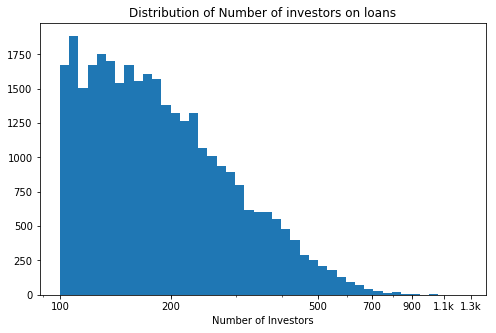

In [39]:
# there's a long tail in the standard, so let's put it on a log scale to get a better idea of the values
log_binsize = 0.025
bins = 10 ** np.arange(2, np.log10(loans['Investors'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'Investors', bins = bins)
plt.xscale('log')
plt.xticks([100, 200, 500, 700, 900, 1100, 1300], ['100', '200', '500', '700', '900', '1.1k', '1.3k'])
plt.xlabel('Number of Investors')
plt.title('Distribution of Number of investors on loans')
plt.show()

The investors amounts formed a long-tailed distribution in the standard scale, with a peak right after 0 and then a drastic drop. When plotted on a log-scale, the laon amount distribution is munimodal, with the highest peak between 120. From the 120 peak, the distribution is pretty uniform before slopping downwards from 200 until it nearly stops at about 1000.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distrbution of the yearly quarters is above 15,000 at it's lowest and across the categories theres a difference range of 5,000 - 10,000.

>The distribution of the loan term is highly biased to longer durations with the 12 month loan term being less than 5,000. While the 60  loan term is about half of the 36 loan terms distribution.

>The distribution of the loan amounts is bimodal right skewed which shows a positive distribution as the loan amount borrowed increases less people take that option. Due to the bunching of bins, I also used a log scale to get a better understanding of the distribution between 0 to 20,000. I can see now that the distribution is multimodal with a no skew.

>The distribution of the number of investors is unimodal and extremely right skewed, it slopes down drastically after the peak. So i used a log scale, to better undeerstand the values between 0 to 600. With this we were able to confirm that the distribution is indeed unimodal and right skewed, with the slope starting just before 200 and trailing off around 1,100.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I noticed that the loan amount distribution was bunching a lot of values 0 to 20,000. So i set the x scale as log and used xticks to set the scale between the datas min and max values with a proper 1-2-5-10 scaling. Doing this gave a better idea of what the bunchings values were and we could see the graph is not skewed.

>For the investors distribution, the peak and trail off was very undescriptive of what the spread of investor funding is there. So i set the x scale as a log then set the xpoints wit xticks to only cover the min and max scope for the data.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

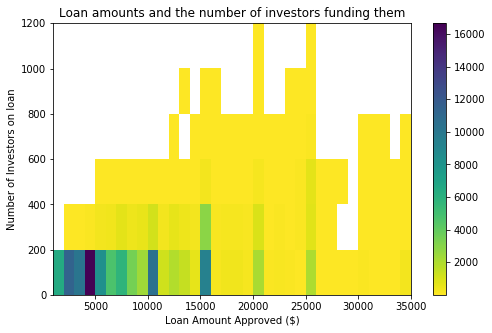

In [40]:
# create heat maps on spread of investors across loan amounts
plt.figure(figsize = [8, 5])

bins_x = np.arange(1000, 35000+1000, 1000)
bins_y = np.arange(1, 1200+200, 200)

h2d = plt.hist2d(data = loans, x = 'LoanOriginalAmount', y = 'Investors', cmin=1, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Loan Amount Approved ($)')
plt.ylabel('Number of Investors on loan')
plt.title('Loan amounts and the number of investors funding them');

Most loan amounts have lower than 400 investors funding from what the graph shows. And that as the loan amount increases there are less investors who invest on it, as you go towards the upper values the number can drop to 1 or 2 investors. With the highest investors funding is from 0 to just above 10,000 and 15,000.

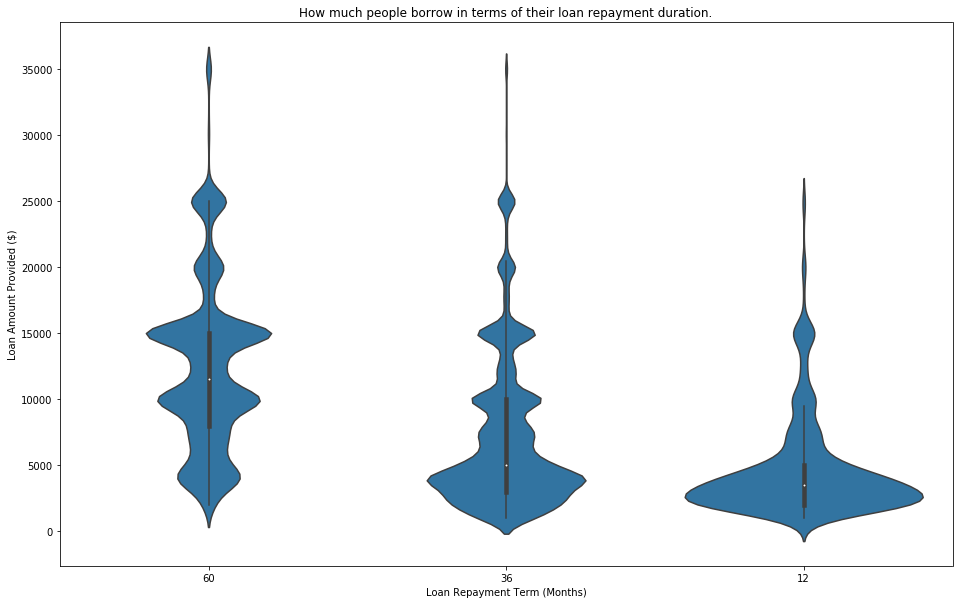

In [41]:
# plot loan term against the laon amounts.
plt.figure(figsize = [16, 10])
base_color = sb.color_palette()[0]

sb.violinplot(data=loans, x='Term', y='LoanOriginalAmount', color=base_color)

plt.xlabel('Loan Repayment Term (Months)')
plt.ylabel('Loan Amount Provided ($)')
plt.title('How much people borrow in terms of their loan repayment duration.');

We can clearly see that the amount of time to repay a loan highly affects the amount of money that is borrowed. With the 12 month loan term, the bulk of loans taken out are lower than 5000. And from here the box plot for longer repayment times gets more distributed upwards, the median of the 12 and 36 loan terms are pretty close but the median for the 60 loan term is much higher showing that there's confidence to borrow money when you have more time to pay back.

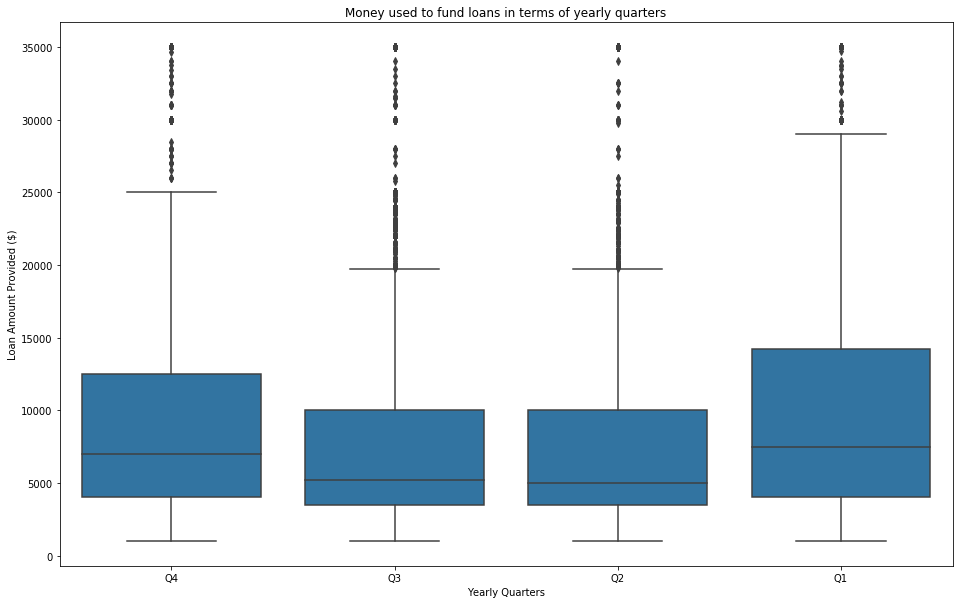

In [43]:
# plot matrix of fiscal quarter against the laon amounts.
plt.figure(figsize = [16, 10])
base_color = sb.color_palette()[0]

sb.boxplot(data=loans, x='LoanOriginQuarter', y='LoanOriginalAmount', color=base_color)

plt.xlabel('Yearly Quarters')
plt.ylabel('Loan Amount Provided ($)')
plt.title('Money used to fund loans in terms of yearly quarters');

Within the first and last quarter of the year, there are more loans taken and approved by prosper than within the middle quarters of the year, even though there are some loans that are taken out at a higher amount most have a range of 5000 to 15,000. This is understandable since time to source the money to loan out during the Q2 and Q3 periods is from those loans taken out during the Q1 and Q4.

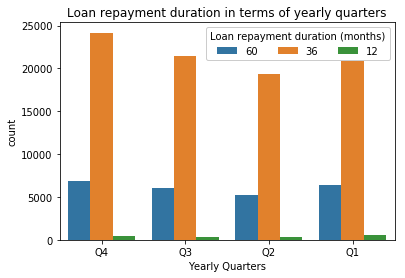

In [45]:
# plot clustered barchart of fiscal quarter with loan repayment duration groupings.
ax = sb.countplot(data = loans, x = 'LoanOriginQuarter', hue = 'Term')
ax.legend(ncol = 3, framealpha = 1, title = 'Loan repayment duration (months)')
plt.xlabel('Yearly Quarters')
plt.title('Loan repayment duration in terms of yearly quarters');

As we saw in the univariate exploration of loan term, 36 month loan terms are the usual choice across all quarters, with it being lowest in the Q2 period which reflects our previous observation that a lot less loansare taken during the Q2 and Q3 periods. But strangely, the 12 month period is almost uniform throughout the yearly quarters.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Seeing how most who borrow 15000 or below have a high chance of getting their loan funded by more than 100 investors. Due to the spread of cases where a loan of that range was actually funded, the numbers being in the 6000 and upward range while cases where the amount was 15000 and above. The numnbers are lower than 2000 and in some cases 0.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is an intresting relationship between yearly quarter and loan amounts, in the last and first quarter of the year a lot of loans are taken out and apporved unlike between the middle quarters where less loans are taken out.

>Also the relationship between the loan amount and the repayment term, the less time to pay back the loan the lower the amount that is actually borrowed and the less the amount taken out are distributed.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [46]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(1000, 35000+1000, 1000)
    bins_y = np.arange(1, 1200+200, 200)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 1)

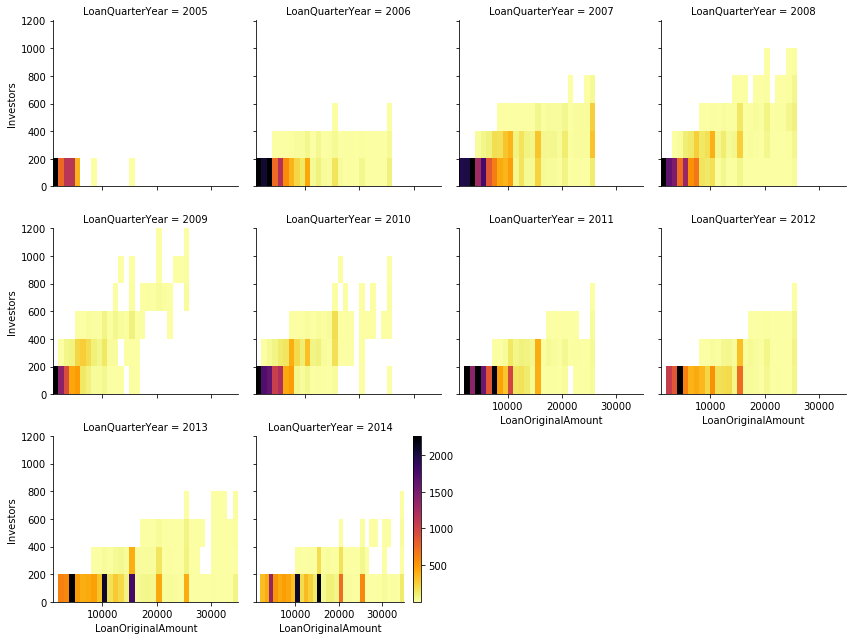

In [47]:
# create heat maps on spread of investors across loan amounts in each fiscal quarter
g = sb.FacetGrid(data = loans, col = 'LoanQuarterYear',col_wrap=4, size = 3,
                margin_titles = True)
g.map(hist2dgrid, 'LoanOriginalAmount', 'Investors', color = 'inferno_r')


plt.colorbar()

In each of the faceted heat maps, you can see the relationship of Fiscal Year against Investor and Loan Amount. As the years were going by, the spread of investor funding increased from below 10,000 to being more distributed across to upwards of 25,000. The highest frequency of investor funding can be seen in 2006, where amounts between 0 to 10,000 had more than 2000 investors funding indivdual loan amounts. But interestingly, we can from 2007 to 2010 there were more investors funding loans with some loan amounts having between 250 to 500 investors.

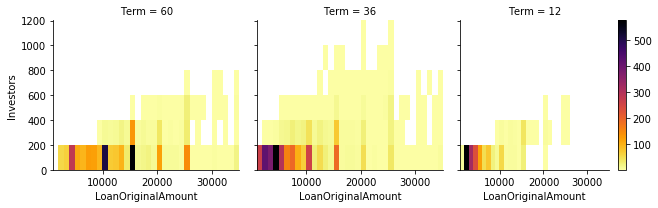

In [48]:
# create heat maps on spread of investors across loan amounts for each loan repayment duration
g = sb.FacetGrid(data = loans, col = 'Term',col_wrap=4, size = 3,
                margin_titles = True)
g.map(hist2dgrid, 'LoanOriginalAmount', 'Investors', color = 'inferno_r')
plt.colorbar()

In each of the faceted heat maps, you can see the relationship of Loan repayment terms against Investor and Loan Amount. As the time provided to pay back the loan gets longer, there's a clear increase to how many investors are willing to invest in the loan. With the 60 month loan term, having the most spread distribution with significant numbers of investors for loan amounts higher than 25,000. While the 12 month loan term, is densely populated around the 0 to 5,000 loan amounts with maximum number of investors being 600 unlike the other loan terms.

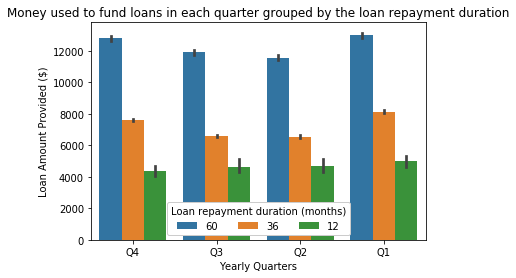

In [49]:
# plot clustered barchart of loan amounts in each fiscal quarter with loan repayment duration groupings.
ax = sb.barplot(data = loans, x = 'LoanOriginQuarter', y = 'LoanOriginalAmount', hue = 'Term')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Loan repayment duration (months)')

plt.xlabel('Yearly Quarters')
plt.ylabel('Loan Amount Provided ($)')
plt.title('Money used to fund loans in each quarter grouped by the loan repayment duration');

From the bivariate exploration of loan term, there is a massive difference in results with 60 months being the most chosen repayment term for higher amounts of loans. This is understandable but the fact that the bivariate graph shows a higher amount of loans in 36 month terms is intresting. But the higher amounts in the Q1 and Q4 are consistent in both explorations.

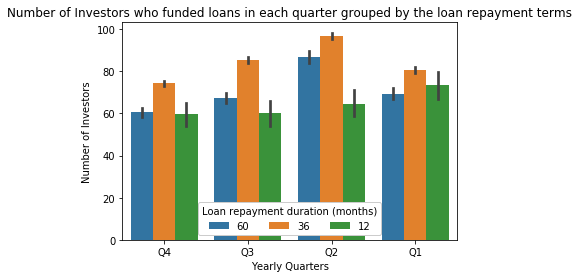

In [50]:
# plot clustered barchart of number of investors in each fiscal quarter with loan repayment duration groupings.
ax = sb.barplot(data = loans, x = 'LoanOriginQuarter', y = 'Investors', hue = 'Term')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Loan repayment duration (months)')

plt.xlabel('Yearly Quarters')
plt.ylabel('Number of Investors')
plt.title('Number of Investors who funded loans in each quarter grouped by the loan repayment terms');

As seen in the bivariate exploration, the most preferred loan term is 36 months. With the difference between 12 and 60 months being less than 10. With the exception of the Q2 quarter which shows a much prominent difference between these two terms.  

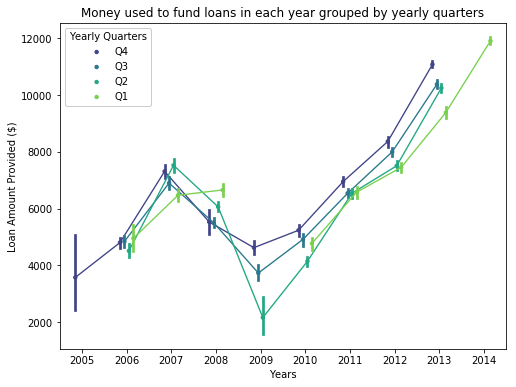

In [51]:
# plot linechart of loan amounts across the years with each loan repayment duration.
plt.figure(figsize = [8,6])

ax = sb.pointplot(data = loans, x = 'LoanQuarterYear', y = 'LoanOriginalAmount', hue = 'LoanOriginQuarter', palette = 'viridis',
                  dodge = 0.3, scale = 0.5)
ax.legend(framealpha = 1, title = 'Yearly Quarters')
ax.set_yticklabels([], minor = True)

plt.xlabel('Years')
plt.ylabel('Loan Amount Provided ($)')
plt.title('Money used to fund loans in each year grouped by yearly quarters');
plt.show();

On average, the amount loans given out by prosper increased every year. There was a drop from 2007 to 2009 but from here there was another rise in the average amounts where they now increased by about 4000 every two years. There is data missing for Q1 in 2009 and Q2,Q3 in 2005 & 2014. Q2 had the highest average from 2007 to 2008and then dipped lower than the rest of the quarters. But Q4 was in the most number of years, from 2009 to 2013.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> It was clear to see the relationship between investors and the loans taken out. In consideration of the loan repayment term and the loan amounts approved. Most of the investors take into consideration the amount of money borrowed and how long the person has to pay it back, these either give cofidence to the investor to indeed fund the loan for asssurance of return on investments or whether it is too high a risk to fund.

>The relationship between loan amounts and loan terms in terms of the yearly quarter, it's clear to see the higher the loan amount the larger loan term is needed to repay the loan.

### Were there any interesting or surprising interactions between features?

> The interaction between the fiscal year and the average loan amounts across the yearly quarters, there was a steady rise in the loan amounts but then a drastic drop from around 7000 in 2007 to between 2000 and 5000 in 2009. But then the loan amounts recovered and rised again to it's peaks in 2013 for Q2, Q3 and Q4 while Q1 reached aboout 12,000 in 2014.

## Conclusions
> From the relationships, we can see that when the loan term is 30months and is of loan amount range of less than 25,000 there is a high chance of getting over 500 cases of 1-200 investors funding a loan. While, a loan of over 25,000 and a loan term of has extremely low chances of being funded or may even not have 1 investor to fund it. The 60 month term is mainly resonably funded in the higher loan due to the understanding that it would take a way to source that level of money.
